In [1]:
import tensorflow as tf
from keras.datasets import mnist
from mnist import MNIST
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
import os
import struct
from array import array


class MNIST(object):
    def __init__(self, path='.'):
        self.path = path

        self.test_img_fname = 't10k-images-idx3-ubyte'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte'

        self.train_img_fname = 'train-images-idx3-ubyte'
        self.train_lbl_fname = 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.load(os.path.join(self.path, self.test_img_fname),
                                os.path.join(self.path, self.test_lbl_fname))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(os.path.join(self.path, self.train_img_fname),
                                os.path.join(self.path, self.train_lbl_fname))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels

    @classmethod
    def display(cls, img, width=28, threshold=200):
        render = ''
        for i in range(len(img)):
            if i % width == 0:
                render += '\n'
            if img[i] > threshold:
                render += '@'
            else:
                render += '.'
        return render

In [3]:
#K NEAREST NEIGHBOURS
data = MNIST("C:/Users/91740/OneDrive/Desktop/SLASH MARKS INTERNSHIP/Handwritten-Digit-Recognition-using-Deep-Learning-main/Handwritten-Digit-Recognition-using-Deep-Learning-main/dataset")
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


In [4]:
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


In [5]:
X = train_img
y = train_labels
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


In [6]:
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)


KNeighborsClassifier(n_jobs=10)

In [7]:
with open('MNIST_KNN.pickle','wb') as f:
  pickle.dump(clf, f)


In [8]:
pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)


In [9]:
confidence = clf.score(X_test,y_test)
confidence

0.973

In [10]:
y_pred = clf.predict(X_test)
y_pred

array([3, 7, 7, ..., 2, 1, 9], dtype=uint8)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.973

In [12]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[610,   0,   1,   0,   0,   0,   5,   0,   0,   1],
       [  0, 689,   0,   0,   0,   0,   0,   1,   0,   0],
       [  6,   5, 588,   2,   0,   0,   0,   4,   1,   1],
       [  1,   1,   2, 566,   0,   1,   1,   3,   3,   2],
       [  2,   7,   0,   0, 561,   0,   2,   3,   1,   6],
       [  1,   0,   0,   5,   0, 532,   3,   0,   1,   1],
       [  0,   1,   0,   0,   1,   3, 588,   0,   0,   0],
       [  1,   4,   0,   1,   2,   0,   0, 603,   0,   6],
       [  2,   7,   1,   8,   3,   8,   1,   2, 554,   7],
       [  3,   3,   0,   7,   6,   1,   0,  11,   0, 547]], dtype=int64)

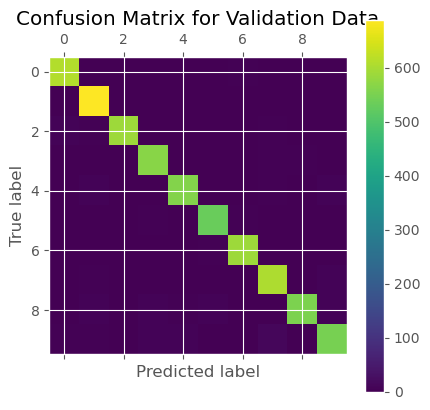

In [13]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
test_labels_pred = clf.predict(test_img)
test_labels_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
acc = accuracy_score(test_labels,test_labels_pred)
acc

0.9681

In [16]:
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)
conf_mat_test

array([[ 973,    1,    1,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  12,    9,  987,    2,    1,    0,    1,   15,    5,    0],
       [   0,    2,    1,  978,    1,   14,    0,    7,    3,    4],
       [   3,    6,    0,    0,  945,    0,    4,    2,    1,   21],
       [   5,    0,    0,   11,    1,  865,    3,    2,    2,    3],
       [   6,    4,    0,    0,    2,    2,  943,    0,    0,    1],
       [   0,   24,    4,    0,    2,    0,    0,  987,    0,   11],
       [   9,    3,    4,   15,    7,   12,    4,    6,  910,    4],
       [   5,    7,    3,    8,    8,    3,    1,   12,    2,  960]],
      dtype=int64)

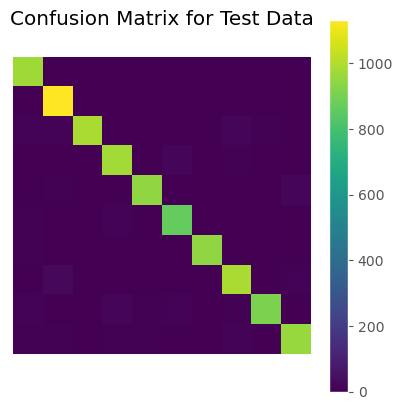

In [17]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

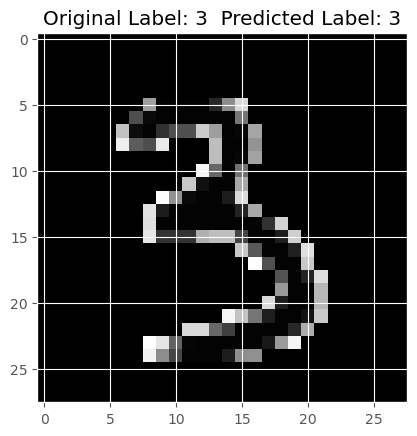

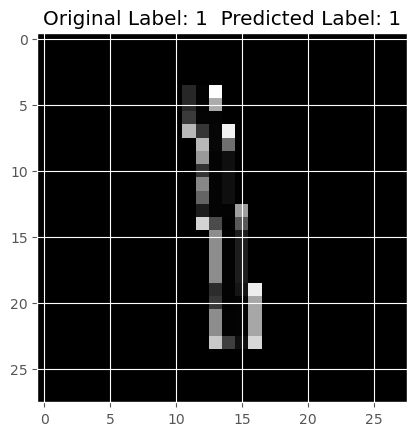

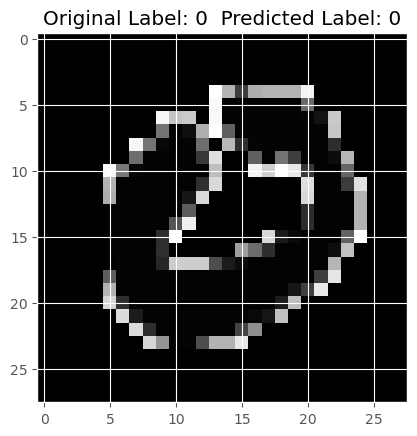

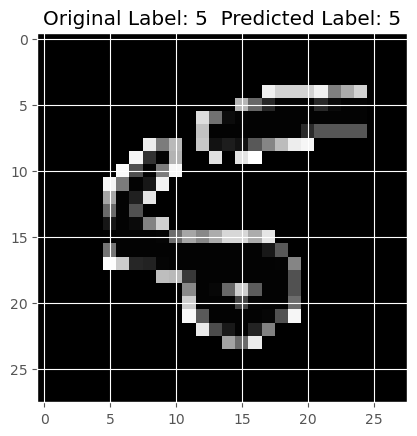

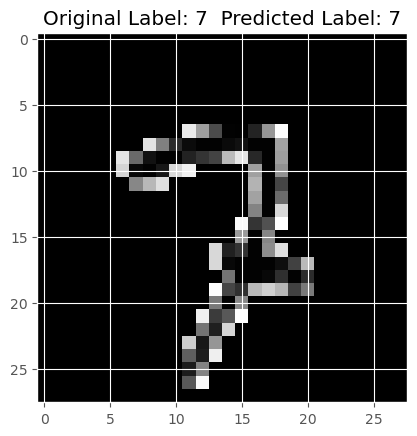

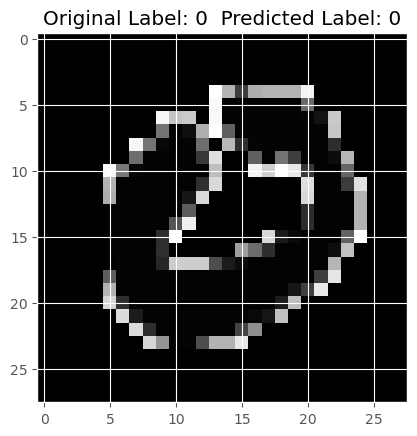

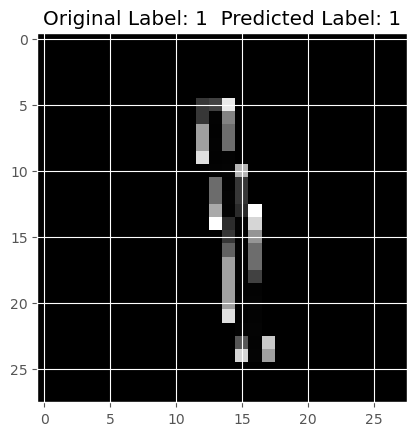

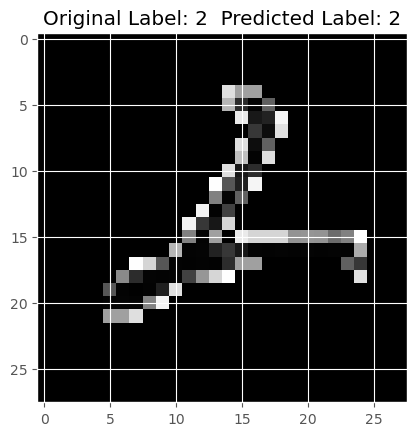

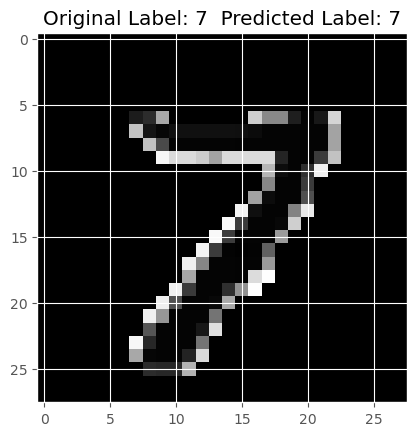

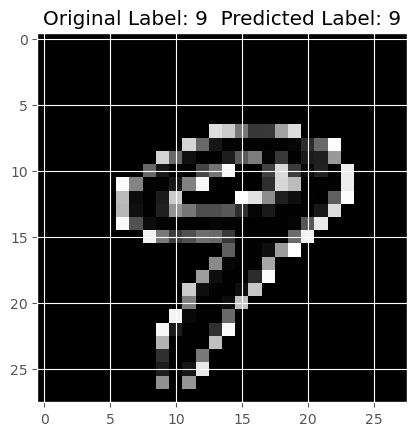

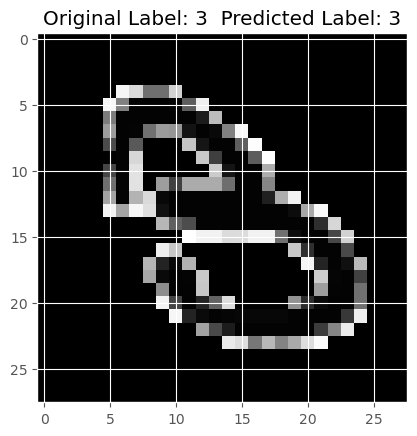

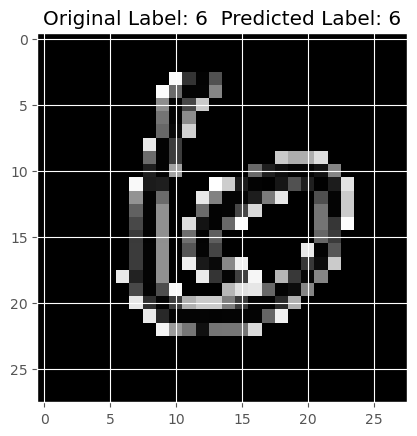

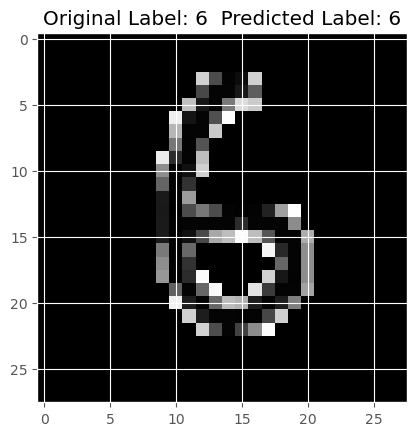

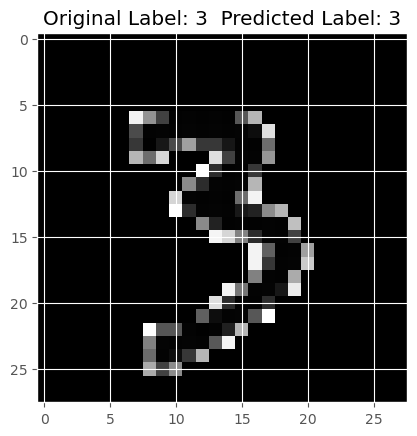

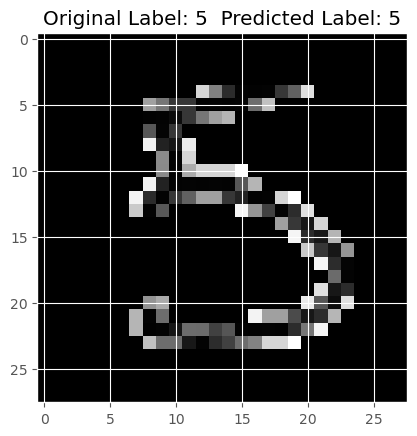

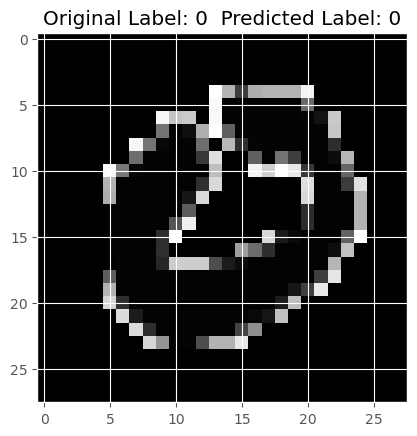

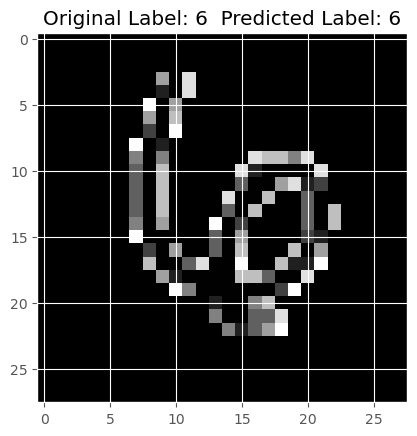

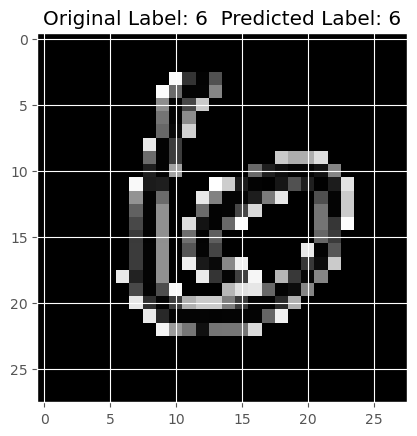

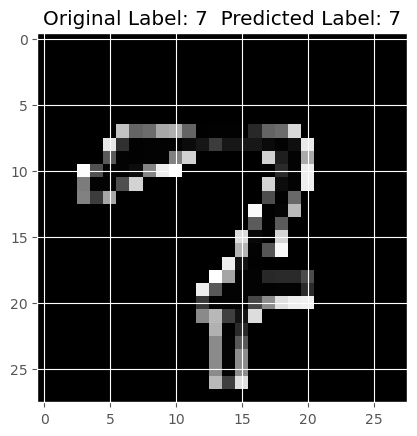

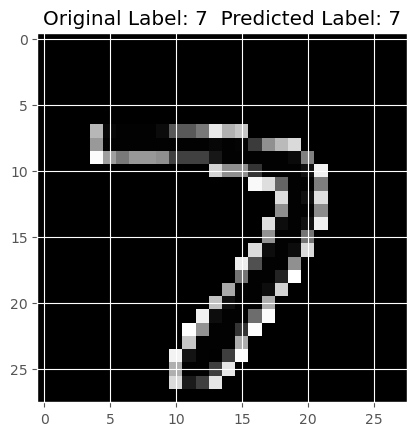

In [18]:
a = np.random.randint(1,50,20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

In [19]:
#SVM 
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [20]:
old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file


In [21]:
data = MNIST("C:/Users/91740/OneDrive/Desktop/SLASH MARKS INTERNSHIP/Handwritten-Digit-Recognition-using-Deep-Learning-main/Handwritten-Digit-Recognition-using-Deep-Learning-main/dataset")

In [22]:
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


In [23]:
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


In [24]:
X = train_img
y = train_labels


In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

In [26]:
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

SVC(gamma=0.1, kernel='poly')

In [27]:
with open('MNIST_SVM.pickle','wb') as f:
    pickle.dump(clf, f)


In [28]:
pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)

In [29]:
acc = clf.score(X_test,y_test)
acc

0.9793333333333333

In [30]:
y_pred = clf.predict(X_test)
y_pred

array([7, 8, 4, ..., 1, 2, 1], dtype=uint8)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9793333333333333

In [32]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[612,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 626,   3,   0,   2,   0,   0,   1,   0,   0],
       [  0,   4, 573,   1,   2,   0,   1,   5,   1,   0],
       [  0,   0,   5, 607,   0,   7,   0,   3,   3,   2],
       [  2,   2,   2,   0, 558,   0,   0,   0,   0,   6],
       [  1,   0,   0,   2,   1, 518,   0,   0,   4,   1],
       [  2,   0,   0,   0,   0,   5, 606,   0,   0,   0],
       [  0,   2,   2,   0,   1,   0,   0, 637,   1,   3],
       [  3,   5,   0,   3,   1,   7,   1,   2, 552,   3],
       [  2,   0,   0,   4,   3,   2,   0,   7,   2, 587]], dtype=int64)

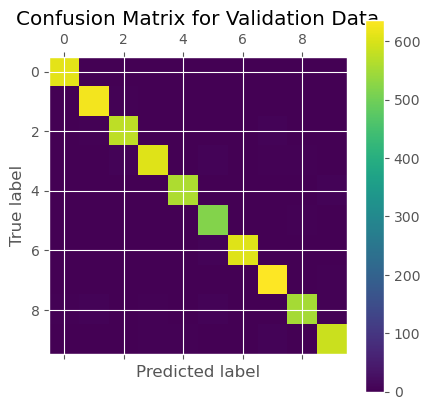

In [33]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
test_labels_pred = clf.predict(test_img)
test_labels_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [35]:
acc = accuracy_score(test_labels,test_labels_pred)
acc

0.9782

In [36]:
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)
conf_mat_test

array([[ 972,    0,    1,    1,    0,    3,    1,    0,    2,    0],
       [   0, 1127,    2,    2,    0,    0,    3,    0,    1,    0],
       [   7,    3, 1004,    0,    3,    0,    4,    8,    3,    0],
       [   0,    2,    1,  990,    0,    4,    0,    5,    4,    4],
       [   2,    0,    2,    0,  967,    0,    3,    0,    0,    8],
       [   2,    0,    2,   15,    1,  863,    4,    1,    2,    2],
       [   4,    5,    1,    0,    3,    5,  938,    0,    2,    0],
       [   0,   10,    8,    1,    1,    0,    0, 1002,    0,    6],
       [   6,    1,    1,    7,    4,    6,    0,    5,  942,    2],
       [   3,    6,    1,    4,   10,    3,    1,    2,    2,  977]],
      dtype=int64)

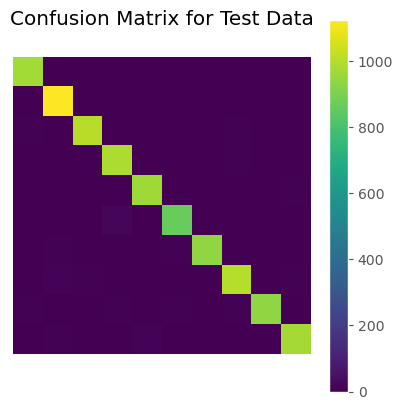

In [37]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

In [38]:
sys.stdout = old_stdout
log_file.close()

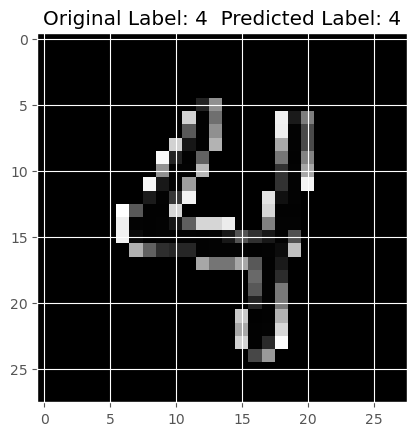

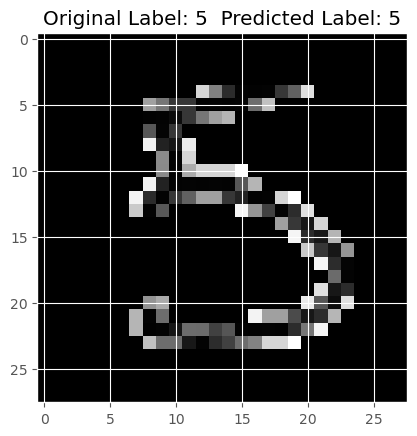

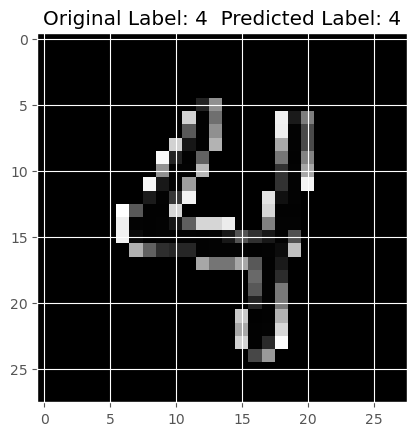

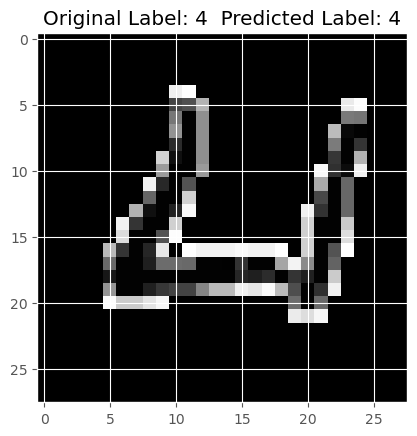

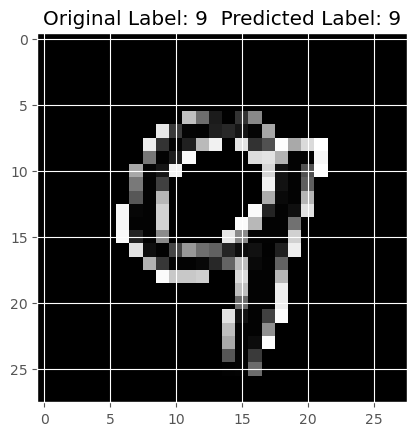

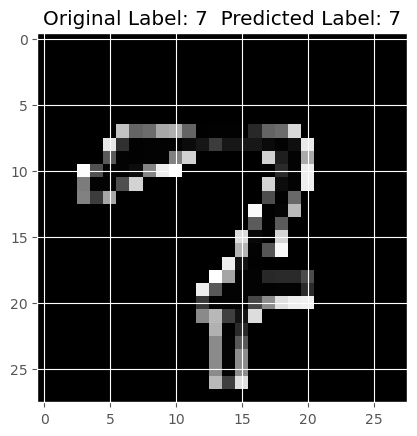

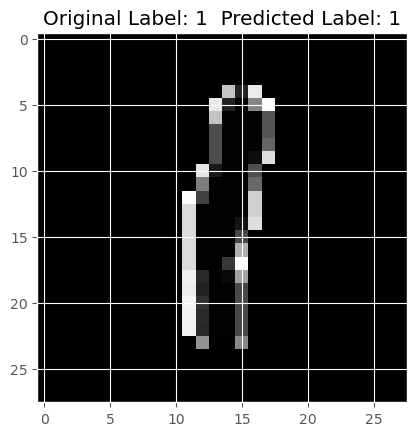

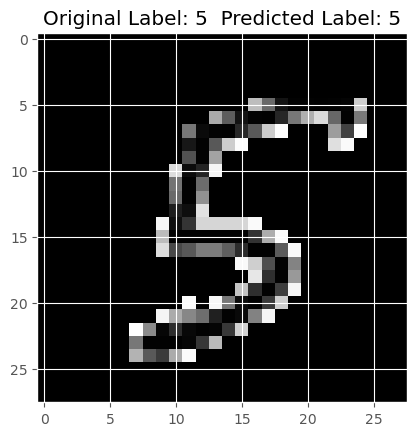

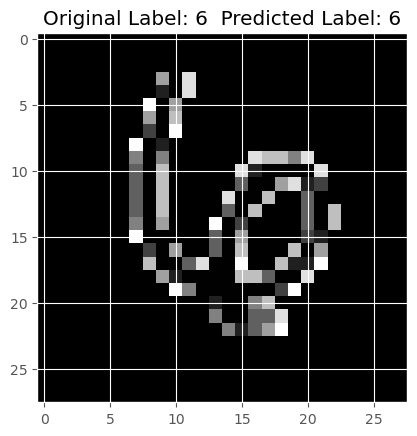

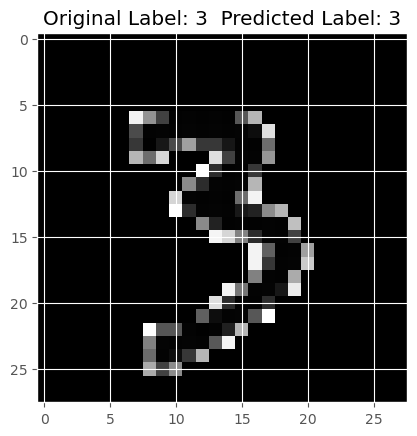

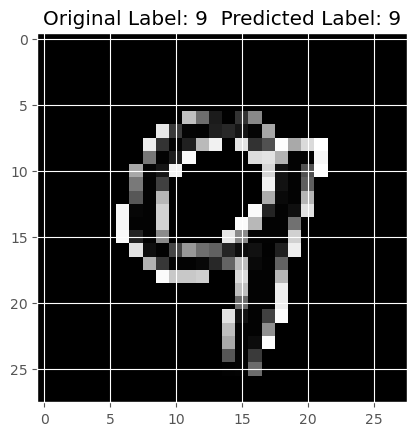

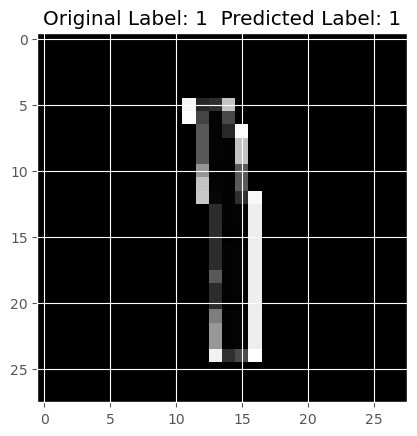

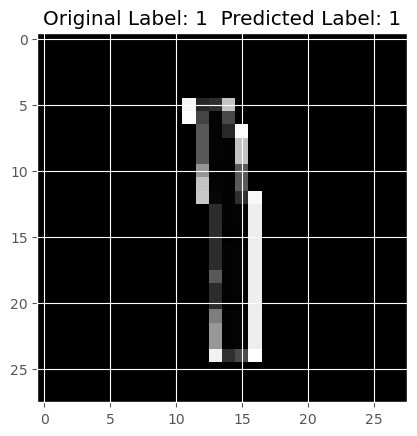

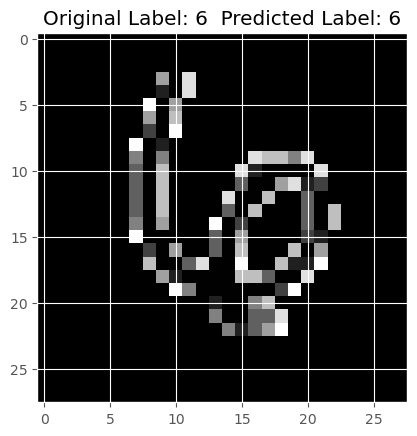

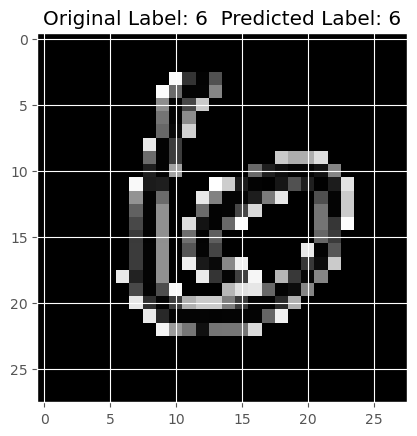

In [39]:
a = np.random.randint(1,40,15)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

In [40]:
#RANDOM FOREST CLASSIFIER
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [41]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)


RandomForestClassifier(n_jobs=10)

In [42]:
with open('MNIST_RFC.pickle','wb') as f:
    pickle.dump(clf, f)

In [43]:
pickle_in = open('MNIST_RFC.pickle','rb')
clf = pickle.load(pickle_in)


In [44]:
confidence = clf.score(X_test,y_test)
confidence

0.9688333333333333

In [45]:
y_pred = clf.predict(X_test)
y_pred

array([7, 8, 4, ..., 1, 2, 1], dtype=uint8)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9688333333333333

In [47]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[612,   0,   0,   0,   0,   0,   1,   0,   1,   0],
       [  0, 623,   3,   3,   0,   0,   0,   2,   1,   0],
       [  0,   1, 571,   1,   2,   0,   3,   5,   3,   1],
       [  0,   2,   6, 593,   0,  10,   1,   5,   6,   4],
       [  1,   1,   1,   0, 552,   0,   1,   1,   2,  11],
       [  2,   0,   0,   5,   1, 505,   4,   2,   5,   3],
       [  2,   0,   1,   0,   0,   5, 605,   0,   0,   0],
       [  0,   2,  10,   1,   5,   1,   0, 619,   2,   6],
       [  2,   2,   2,   3,   2,   4,   0,   0, 557,   5],
       [  1,   1,   1,   8,   5,   3,   0,   5,   7, 576]], dtype=int64)

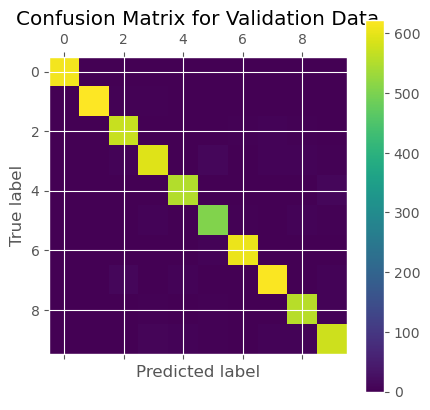

In [48]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
test_labels_pred = clf.predict(test_img)
test_labels_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [50]:
acc = accuracy_score(test_labels,test_labels_pred)
acc

0.969

In [51]:
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)
conf_mat_test

array([[ 967,    0,    0,    0,    0,    3,    4,    2,    4,    0],
       [   0, 1123,    1,    4,    1,    2,    2,    1,    1,    0],
       [   7,    0,  999,    6,    1,    0,    4,    8,    7,    0],
       [   0,    0,   10,  970,    0,    9,    0,   10,    7,    4],
       [   1,    0,    1,    0,  958,    0,    6,    0,    4,   12],
       [   4,    1,    0,   10,    2,  859,    5,    1,    7,    3],
       [   7,    3,    0,    0,    4,    5,  936,    0,    3,    0],
       [   1,    2,   22,    1,    1,    0,    0,  987,    3,   11],
       [   5,    0,    5,    9,    4,    4,    3,    3,  933,    8],
       [   5,    5,    2,   10,   15,    2,    1,    4,    7,  958]],
      dtype=int64)

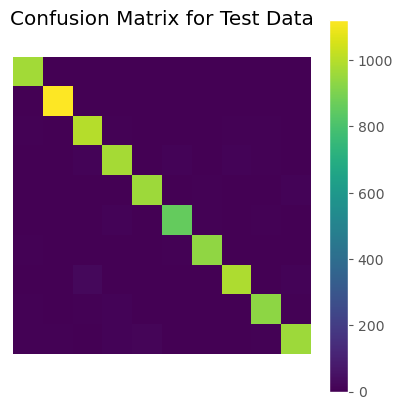

In [52]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

In [53]:
sys.stdout = old_stdout
log_file.close()


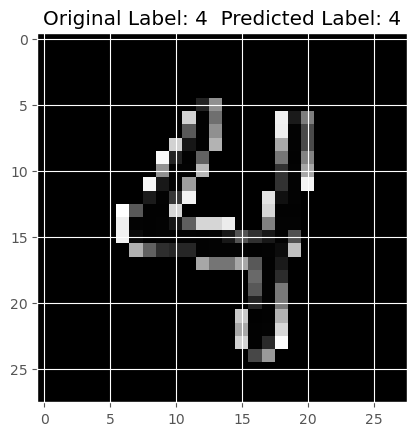

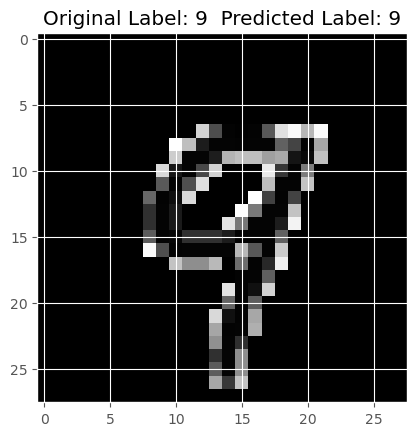

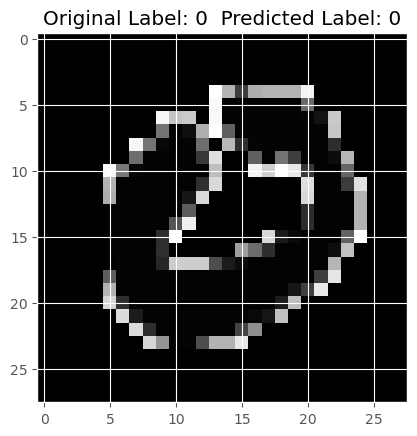

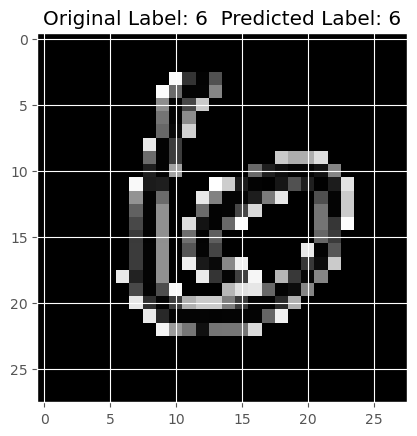

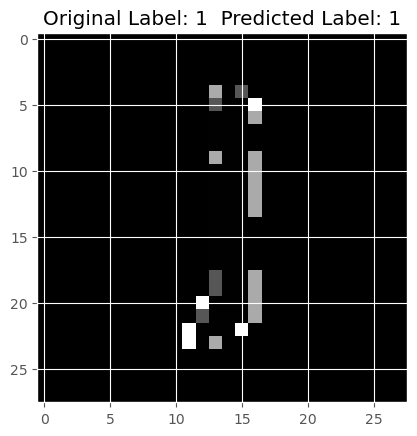

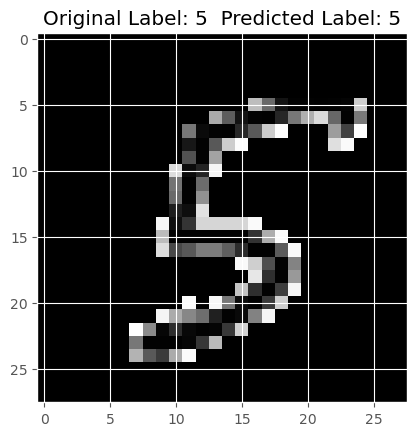

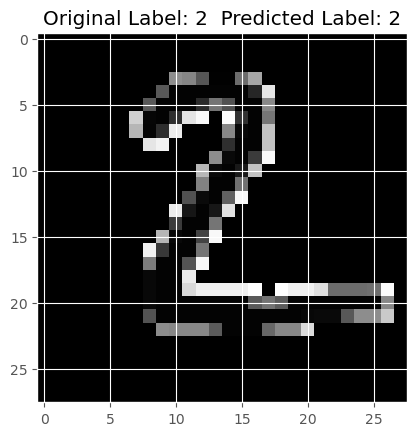

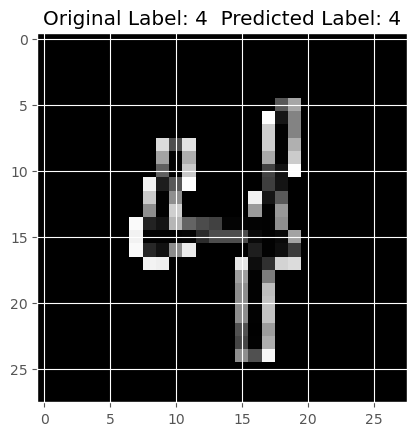

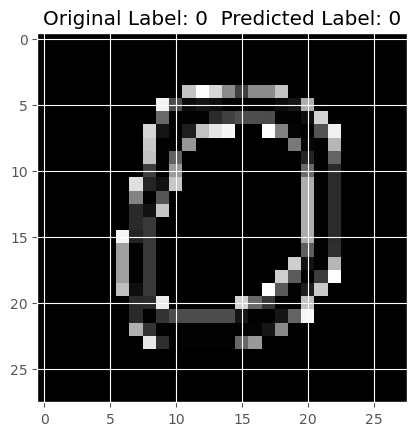

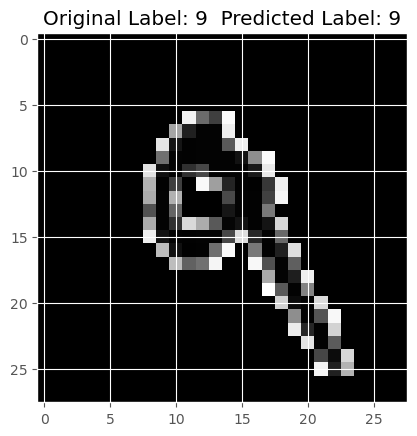

In [54]:
a = np.random.randint(1,30,10)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()